<a href="https://colab.research.google.com/github/SanthoshiRavi/Healthcare-Text-Processing-/blob/main/Healthcare_Text_Classification_BERT_(Trial_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Installation of required packages**

In [ ]:
!pip install biopython


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.7 MB/s eta 0:00:00


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib seaborn


In [ ]:
!pip install gensim

In [ ]:
!pip install nltk

In [ ]:
!pip install transformers

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install torch torchvision torchaudio

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install transformers[torch] accelerate -U


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 31.2 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.40.2
    Uninstalling transformers-4.40.2:
      Successfully uninstalled transformers-4.40.2


In [ ]:
!pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.7 MB/s eta 0:00:00


## **With unbalanced data**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Fetching PubMed articles with URL: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&term=diabetes%20treatment&retmax=100&api_key=665da46bc9103439f93b35c093697bb60e08&retmode=json
Fetched article IDs: ['38768367', '38768334', '38768333', '38768332', '38768328', '38768161', '38768121', '38768080', '38768058', '38768051', '38767849', '38767826', '38767675', '38767674', '38767646', '38767642', '38767350', '38767331', '38767130', '38767128', '38767114', '38767103', '38767101', '38767098', '38767097', '38767095', '38767063', '38766996', '38766907', '38766831', '38766817', '38766710', '38766579', '38766481', '38766443', '38766441', '38766440', '38766439', '38766438', '38766434', '38766433', '38766432', '38766430', '38766429', '38766428', '38766427', '38766425', '38766423', '38766422', '38766351', '38766320', '38766319', '38766281', '38766166', '38765972', '38765955', '38765897', '38765803', '38765768', '38765734', '38765635', '38765603', '38765600', '38765561', '38765471',

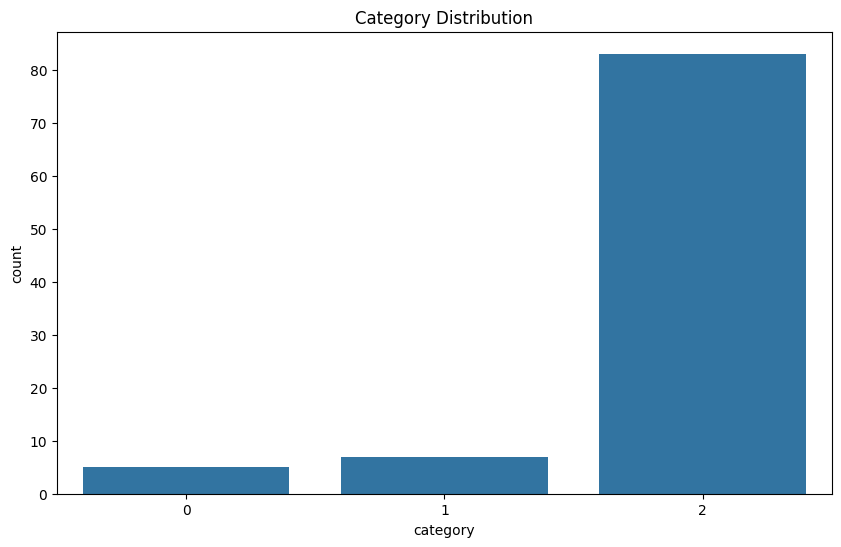

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss


Accuracy: 0.8421052631578947
Precision: 0.2898550724637681
Recall: 0.321285140562249
F1 Score: 0.30476190476190473
Confusion Matrix:
[[ 0  0  5]
 [ 0  0  7]
 [ 2  1 80]]
Enter the PubMed article ID (or type 'exit' to quit): 38768367
Fetching articles with IDs: 38768367
The article does not have an abstract.
Enter the PubMed article ID (or type 'exit' to quit): 38768161
Fetching articles with IDs: 38768161
The article is about: treatment
Enter the PubMed article ID (or type 'exit' to quit): 38767063
Fetching articles with IDs: 38767063
The article is about: treatment
Enter the PubMed article ID (or type 'exit' to quit): 38765600
Fetching articles with IDs: 38765600
The article is about: treatment
Enter the PubMed article ID (or type 'exit' to quit): 38764707
Fetching articles with IDs: 38764707
The article is about: treatment
Enter the PubMed article ID (or type 'exit' to quit): 38767128
Fetching articles with IDs: 38767128
The article is about: treatment
Enter the PubMed article ID (or

In [ ]:
import json
import requests
from urllib.parse import quote
from Bio import Entrez
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
from urllib.error import HTTPError

# Download the NLTK tokenizer data
nltk.download('punkt')

# Function to fetch article IDs based on a query
def fetch_pubmed_articles(query, api_key, max_results=100):
    query_encoded = quote(query)
    url = f'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&term={query_encoded}&retmax={max_results}&api_key={api_key}&retmode=json'
    print(f"Fetching PubMed articles with URL: {url}")  # Debugging line
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        ids = data['esearchresult']['idlist']
        return ids
    else:
        print(f"Error fetching PubMed articles: {response.status_code} - {response.text}")  # Detailed error message
        return None

# Function to fetch article details based on IDs
def fetch_article_details(article_ids, email, api_key=None):
    Entrez.email = email
    if api_key:
        Entrez.api_key = api_key
    ids = ','.join(article_ids)
    print(f"Fetching articles with IDs: {ids}")
    try:
        handle = Entrez.efetch(db="pubmed", id=ids, rettype="abstract", retmode="xml")
        records = Entrez.read(handle)
        handle.close()
        return records
    except HTTPError as e:
        print(f"HTTP Error: {e.code} - {e.reason}")
        return None

def extract_article_info(records):
    articles = []
    if records is None:
        return articles
    for record in records['PubmedArticle']:
        article_info = {}
        article_info['id'] = record['MedlineCitation']['PMID']
        article_info['title'] = record['MedlineCitation']['Article']['ArticleTitle']
        if 'Abstract' in record['MedlineCitation']['Article']:
            article_info['abstract'] = ' '.join(record['MedlineCitation']['Article']['Abstract']['AbstractText'])
        else:
            article_info['abstract'] = None  # Explicitly set to None if abstract is missing
        articles.append(article_info)
    return articles

def fetch_multiple_articles(article_ids, email, api_key=None):
    all_articles = []
    batch_size = 5  # Reduce batch size to 5 for detailed logging
    for i in range(0, len(article_ids), batch_size):
        batch_ids = article_ids[i:i + batch_size]
        records = fetch_article_details(batch_ids, email, api_key)
        if records is None:
            print(f"Failed to fetch batch: {batch_ids}")
            continue
        articles = extract_article_info(records)
        all_articles.extend(articles)
    return all_articles

def save_articles_to_file(articles, file_name):
    with open(file_name, 'w') as file:
        json.dump(articles, file)

# Data Preprocessing
def preprocess_data(file_name):
    with open(file_name, 'r') as file:
        articles = json.load(file)
    df = pd.DataFrame(articles)
    print(f"DataFrame before dropping nulls: {df.head()}")
    df = df.dropna(subset=['abstract'])
    print(f"DataFrame after dropping nulls: {df.head()}")
    return df

# Text Processing with Doc2Vec
def process_text_with_doc2vec(df):
    tagged_data = [TaggedDocument(words=word_tokenize(doc.lower()), tags=[i]) for i, doc in enumerate(df['abstract'])]
    model = Doc2Vec(vector_size=100, alpha=0.025, min_alpha=0.00025, min_count=1, dm=1)
    model.build_vocab(tagged_data)
    for epoch in range(100):
        model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)
        model.alpha -= 0.0002
        model.min_alpha = model.alpha
    return model

# Check for Data Imbalance
def check_data_imbalance(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='category', data=df)
    plt.title('Category Distribution')
    plt.show()

# Train BERT Model
def train_bert_model(df):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

    def encode_data(text_list, labels):
        encodings = tokenizer(text_list, truncation=True, padding=True, max_length=512)
        dataset = Dataset.from_dict({
            'input_ids': encodings['input_ids'],
            'attention_mask': encodings['attention_mask'],
            'labels': labels
        })
        return dataset

    train_texts, val_texts, train_labels, val_labels = train_test_split(df['abstract'], df['category'], test_size=0.2, random_state=42)
    train_dataset = encode_data(train_texts.tolist(), train_labels.tolist())
    val_dataset = encode_data(val_texts.tolist(), val_labels.tolist())

    training_args = TrainingArguments(output_dir='./results', num_train_epochs=3, per_device_train_batch_size=8, per_device_eval_batch_size=8, warmup_steps=500, weight_decay=0.01, logging_dir='./logs')

    trainer = Trainer(model=model, args=training_args, train_dataset=train_dataset, eval_dataset=val_dataset)
    trainer.train()
    return model, tokenizer

# Evaluation Metrics
def evaluate_model(model, tokenizer, df):
    def encode_data(text_list, labels):
        encodings = tokenizer(text_list, truncation=True, padding=True, max_length=512)
        dataset = Dataset.from_dict({
            'input_ids': encodings['input_ids'],
            'attention_mask': encodings['attention_mask'],
            'labels': labels
        })
        return dataset

    texts, labels = df['abstract'].tolist(), df['category'].tolist()
    dataset = encode_data(texts, labels)
    trainer = Trainer(model=model)
    predictions, labels, _ = trainer.predict(dataset)
    predictions = predictions.argmax(axis=1)

    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average='macro')
    recall = recall_score(labels, predictions, average='macro')
    f1 = f1_score(labels, predictions, average='macro')
    conf_matrix = confusion_matrix(labels, predictions)

    return accuracy, precision, recall, f1, conf_matrix

# Continuous Prediction Loop
def continuous_prediction_loop(model, tokenizer):
    while True:
        article_id = input("Enter the PubMed article ID (or type 'exit' to quit): ")
        if article_id.lower() == 'exit':
            break
        email = "santhohope@gmail.com"
        api_key = "665da46bc9103439f93b35c093697bb60e08"
        records = fetch_article_details([article_id], email, api_key)
        if records is None:
            print("Failed to fetch article details. Please try again.")
            continue
        articles = extract_article_info(records)
        if articles:
            abstract = articles[0]['abstract']
            if abstract is None:
                print("The article does not have an abstract.")
                continue
            inputs = tokenizer(abstract, return_tensors='pt', truncation=True, padding=True, max_length=512)
            outputs = model(**inputs)
            prediction = outputs.logits.argmax().item()
            categories = ['prevention', 'diagnosis', 'treatment']
            print(f"The article is about: {categories[prediction]}")
        else:
            print("No article found with the provided ID.")

if __name__ == "__main__":
    email = "santhohope@gmail.com"  # Replace with your email
    api_key = "665da46bc9103439f93b35c093697bb60e08"  # Replace with your PubMed API key

    query = "diabetes treatment"  # Replace with your query
    article_ids = fetch_pubmed_articles(query, api_key)
    if article_ids is None:
        print("Failed to fetch article IDs.")
    else:
        print(f"Fetched article IDs: {article_ids}")

        articles = fetch_multiple_articles(article_ids, email, api_key)
        print(f"Total articles fetched: {len(articles)}")
        save_articles_to_file(articles, "fetched_articles.json")

        # Display the fetched articles with their IDs
        for article in articles:
            print(f"ID: {article['id']}, Title: {article['title']}, Abstract: {article['abstract']}")

        df = preprocess_data("fetched_articles.json")

        # Adding a placeholder 'category' column for demonstration purposes. In practice, you need labeled data.
        df['category'] = df['abstract'].apply(lambda x: 0 if 'prevention' in x else (1 if 'diagnosis' in x else 2))

        doc2vec_model = process_text_with_doc2vec(df)

        check_data_imbalance(df)

        bert_model, tokenizer = train_bert_model(df)

        accuracy, precision, recall, f1, conf_matrix = evaluate_model(bert_model, tokenizer, df)

        print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}\nConfusion Matrix:\n{conf_matrix}")

        continuous_prediction_loop(bert_model, tokenizer)


## **With balanced data**

### Data fetching

In [ ]:
# data_fetching.py

import json
import requests
from urllib.parse import quote
from Bio import Entrez
from urllib.error import HTTPError

def fetch_pubmed_articles(query, api_key, max_results=100):
    query_encoded = quote(query)
    url = f'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&term={query_encoded}&retmax={max_results}&api_key={api_key}&retmode=json'
    print(f"Fetching PubMed articles with URL: {url}")
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        ids = data['esearchresult']['idlist']
        return ids
    else:
        print(f"Error fetching PubMed articles: {response.status_code} - {response.text}")
        return None

def fetch_article_details(article_ids, email, api_key=None):
    Entrez.email = email
    if api_key:
        Entrez.api_key = api_key
    ids = ','.join(article_ids)
    print(f"Fetching articles with IDs: {ids}")
    try:
        handle = Entrez.efetch(db="pubmed", id=ids, rettype="abstract", retmode="xml")
        records = Entrez.read(handle)
        handle.close()
        return records
    except HTTPError as e:
        print(f"HTTP Error: {e.code} - {e.reason}")
        return None

def extract_article_info(records):
    articles = []
    if records is None:
        return articles
    for record in records['PubmedArticle']:
        article_info = {}
        article_info['id'] = record['MedlineCitation']['PMID']
        article_info['title'] = record['MedlineCitation']['Article']['ArticleTitle']
        if 'Abstract' in record['MedlineCitation']['Article']:
            article_info['abstract'] = ' '.join(record['MedlineCitation']['Article']['Abstract']['AbstractText'])
        else:
            article_info['abstract'] = None  # Explicitly set to None if abstract is missing
        articles.append(article_info)
    return articles

def fetch_multiple_articles(article_ids, email, api_key=None):
    all_articles = []
    batch_size = 5  # Reduce batch size to 5 for detailed logging
    for i in range(0, len(article_ids), batch_size):
        batch_ids = article_ids[i:i + batch_size]
        records = fetch_article_details(batch_ids, email, api_key)
        if records is None:
            print(f"Failed to fetch batch: {batch_ids}")
            continue
        articles = extract_article_info(records)
        all_articles.extend(articles)
    return all_articles

def save_articles_to_file(articles, file_name):
    with open(file_name, 'w') as file:
        json.dump(articles, file)

if __name__ == "__main__":
    email = "santhohope@gmail.com"
    api_key = "665da46bc9103439f93b35c093697bb60e08"
    query = "diabetes"

    article_ids = fetch_pubmed_articles(query, api_key)
    if article_ids is None:
        print("Failed to fetch article IDs.")
    else:
        print(f"Fetched article IDs: {article_ids}")
        articles = fetch_multiple_articles(article_ids, email, api_key)
        print(f"Total articles fetched: {len(articles)}")
        save_articles_to_file(articles, "fetched_articles.json")
        for article in articles:
            print(f"ID: {article['id']}, Title: {article['title']}, Abstract: {article['abstract']}")


Fetching PubMed articles with URL: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&term=diabetes&retmax=100&api_key=665da46bc9103439f93b35c093697bb60e08&retmode=json
Fetched article IDs: ['38769011', '38768904', '38768871', '38768867', '38768866', '38768849', '38768826', '38768824', '38768822', '38768802', '38768794', '38768690', '38768659', '38768620', '38768619', '38768613', '38768605', '38768555', '38769599', '38769592', '38769575', '38769570', '38769562', '38769550', '38769546', '38769533', '38769523', '38769507', '38769500', '38769477', '38769466', '38769435', '38769420', '38769364', '38769347', '38769300', '38769296', '38769291', '38769236', '38769229', '38769223', '38769209', '38769135', '38769127', '38769046', '38769035', '38768417', '38768416', '38768368', '38768367', '38768366', '38768365', '38768336', '38768335', '38768334', '38768333', '38768332', '38768331', '38768330', '38768329', '38768328', '38768269', '38768242', '38768222', '38768161', '38768159',

### Data Preprocessing using DocToVector

DataFrame before dropping nulls:          id                                              title  \
0  38769011  Evaluation of systemic medications associated ...   
1  38768904  Postpartum Blood Pressure Control and the Rate...   
2  38768871  Pomegranate (Punica granatum L.) phytochemical...   
3  38768867  Association of sodium-glucose cotransporter 2 ...   
4  38768866  The effects of policosanol supplementation on ...   

                                            abstract  
0  This study aims to investigate the association...  
1  Postpartum hypertension is a major contributor...  
2  Pomegranate (Punica granatum L.) is a multipur...  
3  We investigated the relationship between sodiu...  
4  Previous studies have assessed how supplementi...  
DataFrame after dropping nulls:          id                                              title  \
0  38769011  Evaluation of systemic medications associated ...   
1  38768904  Postpartum Blood Pressure Control and the Rate...   
2  3876887

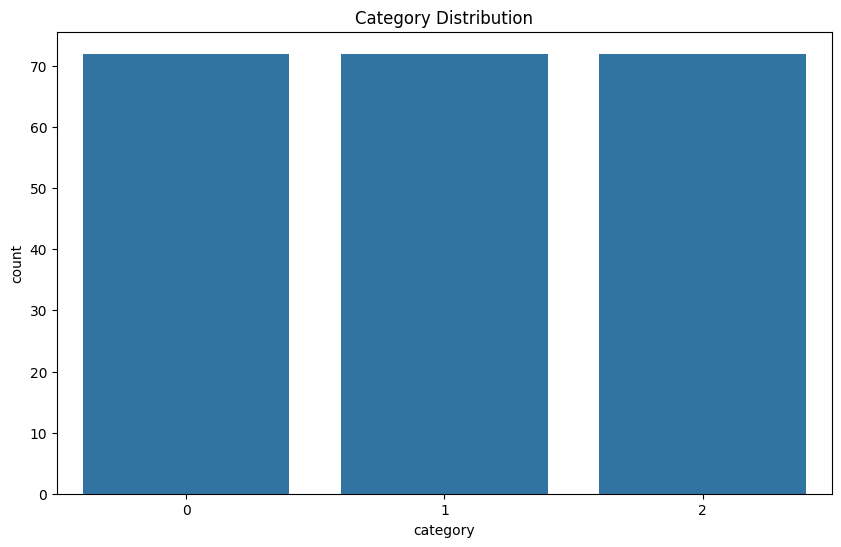

In [ ]:
# data_preprocessing.py

import pandas as pd
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(file_name):
    with open(file_name, 'r') as file:
        articles = json.load(file)
    df = pd.DataFrame(articles)
    print(f"DataFrame before dropping nulls: {df.head()}")
    df = df.dropna(subset=['abstract'])
    print(f"DataFrame after dropping nulls: {df.head()}")
    return df

def balance_dataset(df):
    class_counts = df['category'].value_counts()
    max_class_count = class_counts.max()

    df_balanced = df.copy()
    for category, count in class_counts.items():
        if count < max_class_count:
            df_to_add = df[df['category'] == category]
            df_balanced = pd.concat([df_balanced, df_to_add.sample(max_class_count - count, replace=True)])

    return df_balanced

def process_text_with_doc2vec(df):
    tagged_data = [TaggedDocument(words=word_tokenize(doc.lower()), tags=[i]) for i, doc in enumerate(df['abstract'])]
    model = Doc2Vec(vector_size=100, alpha=0.025, min_alpha=0.00025, min_count=1, dm=1)
    model.build_vocab(tagged_data)
    for epoch in range(10):  # Reduce epochs for faster testing
        model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)
        model.alpha -= 0.0002
        model.min_alpha = model.alpha
    return model

def check_data_imbalance(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='category', data=df)
    plt.title('Category Distribution')
    plt.show()

if __name__ == "__main__":
    df = preprocess_data("fetched_articles.json")
    df['category'] = df['abstract'].apply(lambda x: 0 if 'prevention' in x else (1 if 'diagnosis' in x else 2))
    df_balanced = balance_dataset(df)
    check_data_imbalance(df_balanced)
    doc2vec_model = process_text_with_doc2vec(df_balanced)
    df_balanced.to_csv("balanced_articles.csv", index=False)


### Model training using BERT

In [ ]:
# model_training.py

import pandas as pd
import torch
from torch.nn import CrossEntropyLoss
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

class WeightedTrainer(Trainer):
    def __init__(self, class_weights, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.class_weights = class_weights

    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs[0]
        loss_fct = CrossEntropyLoss(weight=self.class_weights)
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

def encode_data(text_list, labels, tokenizer):
    encodings = tokenizer(text_list, truncation=True, padding=True, max_length=512)
    dataset = Dataset.from_dict({
        'input_ids': encodings['input_ids'],
        'attention_mask': encodings['attention_mask'],
        'labels': labels
    })
    return dataset

def train_bert_model(df):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

    train_texts, val_texts, train_labels, val_labels = train_test_split(df['abstract'], df['category'], test_size=0.2, random_state=42)
    train_dataset = encode_data(train_texts.tolist(), train_labels.tolist(), tokenizer)
    val_dataset = encode_data(val_texts.tolist(), val_labels.tolist(), tokenizer)

    class_weights = compute_class_weight('balanced', classes=[0, 1, 2], y=train_labels)
    class_weights = torch.tensor(class_weights, dtype=torch.float)

    training_args = TrainingArguments(output_dir='./results', num_train_epochs=3, per_device_train_batch_size=8, per_device_eval_batch_size=8, warmup_steps=500, weight_decay=0.01, logging_dir='./logs')

    trainer = WeightedTrainer(
        class_weights=class_weights,
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
    )
    trainer.train()
    model.save_pretrained('./bert_model')
    tokenizer.save_pretrained('./bert_tokenizer')

if __name__ == "__main__":
    df_balanced = pd.read_csv("balanced_articles.csv")
    train_bert_model(df_balanced)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss


### Model Evaluation and Classification report

In [ ]:
# model_evaluation.py

import pandas as pd
import torch
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from transformers import BertTokenizer, BertForSequenceClassification, Trainer
from datasets import Dataset

def encode_data(text_list, labels, tokenizer):
    encodings = tokenizer(text_list, truncation=True, padding=True, max_length=512)
    dataset = Dataset.from_dict({
        'input_ids': encodings['input_ids'],
        'attention_mask': encodings['attention_mask'],
        'labels': labels
    })
    return dataset

def evaluate_model(df):
    tokenizer = BertTokenizer.from_pretrained('./bert_tokenizer')
    model = BertForSequenceClassification.from_pretrained('./bert_model')

    texts, labels = df['abstract'].tolist(), df['category'].tolist()
    dataset = encode_data(texts, labels, tokenizer)

    trainer = Trainer(model=model)
    predictions, labels, _ = trainer.predict(dataset)
    predictions = predictions.argmax(axis=1)

    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average='macro')
    recall = recall_score(labels, predictions, average='macro')
    f1 = f1_score(labels, predictions, average='macro')
    conf_matrix = confusion_matrix(labels, predictions)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Confusion Matrix:")
    print(conf_matrix)

    # Classification Report
    report = classification_report(labels, predictions, target_names=['prevention', 'diagnosis', 'treatment'])
    print("\nClassification Report:")
    print(report)

    # Add predictions to the DataFrame
    df['predicted_category'] = predictions
    df['predicted_category'] = df['predicted_category'].apply(lambda x: 'prevention' if x == 0 else ('diagnosis' if x == 1 else 'treatment'))

    # Save the DataFrame with predictions to a CSV file
    df.to_csv("predicted_articles.csv", index=False)
    print("Predictions saved to predicted_articles.csv")

if __name__ == "__main__":
    df_balanced = pd.read_csv("balanced_articles.csv")
    evaluate_model(df_balanced)


Accuracy: 0.7222222222222222
Precision: 0.8422730422730423
Recall: 0.7222222222222222
F1 Score: 0.6616289809020041
Confusion Matrix:
[[72  0  0]
 [ 0 72  0]
 [ 2 58 12]]

Classification Report:
              precision    recall  f1-score   support

  prevention       0.97      1.00      0.99        72
   diagnosis       0.55      1.00      0.71        72
   treatment       1.00      0.17      0.29        72

    accuracy                           0.72       216
   macro avg       0.84      0.72      0.66       216
weighted avg       0.84      0.72      0.66       216

Predictions saved to predicted_articles.csv


### Predicting the labels as (treatment/diagnosis/prevention) for the entered article ID

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

def continuous_prediction_loop():
    tokenizer = BertTokenizer.from_pretrained('./bert_tokenizer')
    model = BertForSequenceClassification.from_pretrained('./bert_model')

    while True:
        article_id = input("Enter the PubMed article ID (or type 'exit' to quit): ")
        if article_id.lower() == 'exit':
            break
        email = "santhohope@gmail.com"
        api_key = "665da46bc9103439f93b35c093697bb60e08"
        records = fetch_article_details([article_id], email, api_key)
        if records is None:
            print("Failed to fetch article details. Please try again.")
            continue
        articles = extract_article_info(records)
        if articles:
            abstract = articles[0]['abstract']
            if abstract is None:
                print("The article does not have an abstract.")
                continue
            inputs = tokenizer(abstract, return_tensors='pt', truncation=True, padding=True, max_length=512)
            outputs = model(**inputs)
            prediction = outputs.logits.argmax().item()
            categories = ['prevention', 'diagnosis', 'treatment']
            print(f"The article is about: {categories[prediction]}")
        else:
            print("No article found with the provided ID.")

# Make sure to define fetch_article_details and extract_article_info functions in the same cell or import them if they are defined elsewhere in the notebook.

# continuous prediction loop
continuous_prediction_loop()


Enter the PubMed article ID (or type 'exit' to quit): 38769011
Fetching articles with IDs: 38769011
The article is about: prevention
Enter the PubMed article ID (or type 'exit' to quit): 38768904
Fetching articles with IDs: 38768904
The article is about: treatment
Enter the PubMed article ID (or type 'exit' to quit): 38768690
Fetching articles with IDs: 38768690
The article is about: diagnosis
Enter the PubMed article ID (or type 'exit' to quit): 38768794
Fetching articles with IDs: 38768794
The article is about: diagnosis
Enter the PubMed article ID (or type 'exit' to quit): 38768659
Fetching articles with IDs: 38768659
The article is about: diagnosis
Enter the PubMed article ID (or type 'exit' to quit): 38769364
Fetching articles with IDs: 38769364
The article is about: prevention
Enter the PubMed article ID (or type 'exit' to quit): 38769435
Fetching articles with IDs: 38769435
The article is about: diagnosis
Enter the PubMed article ID (or type 'exit' to quit): 38768620
Fetching ar